# Titanic tutorial


일반적인 Kaggle 데이터 분석은 다음과 같은 단계로 진행됩니다.
1. 문제 정의
2. 데이터 준비
3. 데이터 전처리
4. 탐색적 자료 분석
5. 모델 적합 및 예측
6. 시각화 및 보고서 작성
7. 결과 제출  

이를 모두 지켜 진행 할 필요는 없으며,  
상황에 맞춰 유동적으로 진행하시면 됩니다.

이 커널에서는 아래와 같은 순서로 진행하도록 하겠습니다.  

##  WorkFlow
1. 데이터 셋 확인
 - 데이터의 타입이 어떻게 구성돼 있는지 확인합니다.
 - 모든 값이 존재하는지 여부를 파악합니다.
2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)
 - 데이터들 사이의 관계를 파악합니다.
 - 특별하고 이상한 값은 없는지 확인합니다. 
3. 특성 공학(Feature Engineering)
 - 값을 채워 넣거나 특이점 있는 부분을 수정합니다.
 - 데이터를 잘 설명할 수 있는 새로운 변수를 생성합니다.
 - 모델에 적합하기 좋은 형태로 만듭니다.
4. 모델 생성 및 학습
 - 적합할 모델을 만들고 학습합니다.
5. 모델 예측 및 평가
 - 학습 된 모델을 통해 새로운 데이터의 값을 예측 및 평가합니다.
 
## Reference

이 글은 아래의 커널 및 영상을 참고하여 작성 하였습니다.  
- [Titanic Data Science Solutions](www.kaggle.com/startupsci/titanic-data-science-solutions)
- [[GUIDE, KOR, DG] 데이터 분석 어떻게 시작해야 하나요?](https://www.kaggle.com/daehungwak/guide-kor-dg)
- [타이타닉 튜토리얼](https://kaggle-kr.tistory.com/17?category=868316)
- [[수비니움 캐글 따라하기]](https://www.youtube.com/watch?v=bGGnlvsS8ao)
- [EDA To Prediction(DieTanic)](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)
---

## 1. 데이터 셋 확인  

우리가 다룰 데이터는 [Titanic](https://www.kaggle.com/c/titanic) 입니다.  
Titanic은 2200여명의 승선자 중 1500여명이 사망한 기록을 담은 데이터입니다.    
탑승객의 이름, 성별, 나이 등을 기록을 통해  
이를 통해 생존 여부를 예측하는 것이 목표 입니다.  

데이터를 불러오기 앞서 필요한 도구들을 불러옵니다.
- 데이터 분석용 : numpy, pandas
- 데이터 시각화 : seaborn, matplotlib, missingno
- 모델 적합 및 예측 : sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale = 2)
# 그래프의 기본 스타일과 font크기를 설정하는 코드입니다.

In [2]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 그래프 한글 표시 깨짐 방지
mpl.rc('axes', unicode_minus = False) # 그래프 minus 표시 깨짐 방지

데이터를 불러 오도록 하겠습니다.

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [4]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train 데이터의 경우  
891개의 행과 12개의 변수를 가지고 있습니다.

In [5]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


test 데이터의 경우  
418개의 행과 11개의 변수를 가지고 있습니다.

train과 test에서 변수의 개수 차이가 존재하는데요.  
이는 우리가 예측해야 할 `Survived` 변수가 빠져있기 때문입니다.

In [6]:
df_train.info()
print('-'*20)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare        

다음은 우리가 분석에 사용할  
변수 설명입니다.

__변수 설명__
- `Survival` : 생존 여부(0 = 사망, 1 = 생존)
- `Pclass` : 티켓 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
- `Sex` : 성별
- `Age` : 나이
- `SibSp` : 함께 탑승한 형제/자매 또는 배우자 수
- `Parch` : 함께 탑승한 부모 또는 자녀 수
- `Ticket` : 티켓 번호
- `Fare` : 탑승 요금
- `Cabin` : 선실 번호
- `Embarked` : 탑승 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

PassengerId 변수의 경우 일련번호로써  
분석에서 사용하지 않으므로 향후 제거하도록 하겠습니다.

### 1.1 데이터  요약통계치

요약 통계치의 경우  
데이터의 분포와 기초 통계량에 대해 나타내주며  
데이터의 타입에 따라 다르게 나타납니다.  

수치형 데이터
- 총 개수, 데이터의 평균, 중위수, 표준편차 등의 값을 표현해 줍니다.

문자형 데이터
- 총 개수, 빈도수 등의 값을 표현해 줍니다.

기본값은 수치형 데이터만 표현되며  
문자형 데이터만 보고 싶을 경우 `include = 'O'`(대문자 'O'),  
모두 보고 싶을 경우 `include = 'all'`을 작성합니다.

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Anderson, Mr. Harry",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


`Survived` : 0과 1로 이뤄져 있으며, 약 38%의 생존률을 보입니다.   
`Pclass` : 50% 이상의 값이 3의 값을 차지 하고 있습니다.  
`Age` : 평균 나이는 약 30세이며, 탑승객의 절반 정도는 20~30대 입니다.  
`SibSp` : 배우자 또는 형제/자매와 탑승하지 않은 사람들이 많습니다.  
`Parch` : 대분의 탑승객들이 부모님 또는 자녀들과 함께 탑승하지 않은 것으로 보입니다.  
`Fare` : 돈을 내지 않은 사람이 존재하며, 값을 크게 지불한 경우도 존재합니다.  
`Sex` : 성별은 남성이 여성보다 많습니다.  
`Embarked` : S 항구에서 많은 사람들이 탑승했습니다.

train 데이터의 경우  
`Age`, `Cabin`, `Embarked` 변수에  
결측치가 존재합니다.

In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df_test.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Wick, Mr. George Dennick",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


test 데이터도 살피며, 위와 같이 해석해 봅시다!!

test 데이터의 경우  
`Age`, `Fare`, `Cabin` 변수에  
결측치가 존재합니다.


### 1.2 결측치 시각화
시각화 전, 변수들이 얼마만큼 결측치를 갖고있는지 확인해 보겠습니다.

In [11]:
(df_train.isnull().sum() / df_train.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

train 데이터 경우  
`Age` : 19.87%  
`Cabin` : 77.10 %  
`Embarked` : 0. 22%  
의 결측치가 존재합니다.

In [12]:
(df_test.isnull().sum() / df_test.shape[0]) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

test 데이터 경우  
`Age` : 20.57%  
`Fare` : 0. 24%  
`Cabin` : 78.23 %  
의 결측치가 존재합니다.

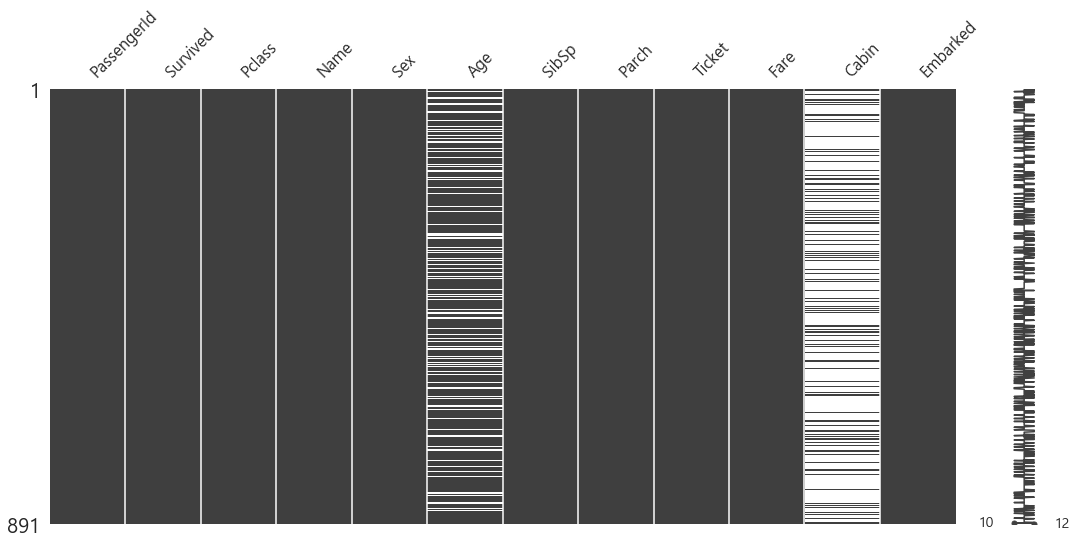

In [13]:
msno.matrix(df_train, figsize = (18, 8))

그래프에 공백의 양에 따라 결측치가 얼마나 많은지를 표현합니다.  
하지만, 몇개의 결측치가 존재하는지 명확하게 파악할 수 없습니다. 

바그래프를 이용해 결측치의 양을 좀 더 명확히 알 수 있습니다.

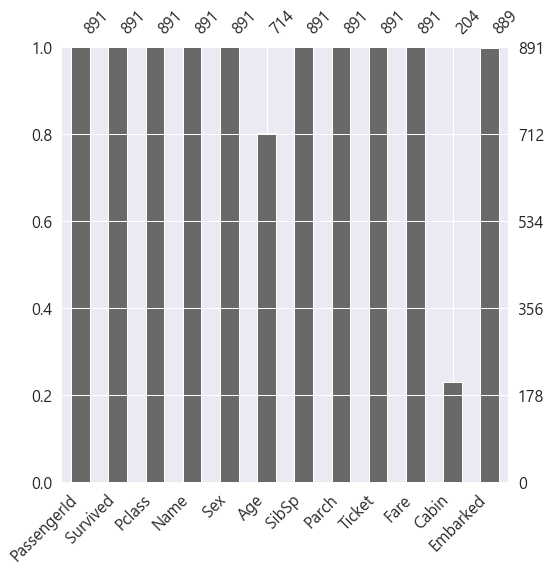

In [14]:
msno.bar(df_train, figsize = (8, 8))

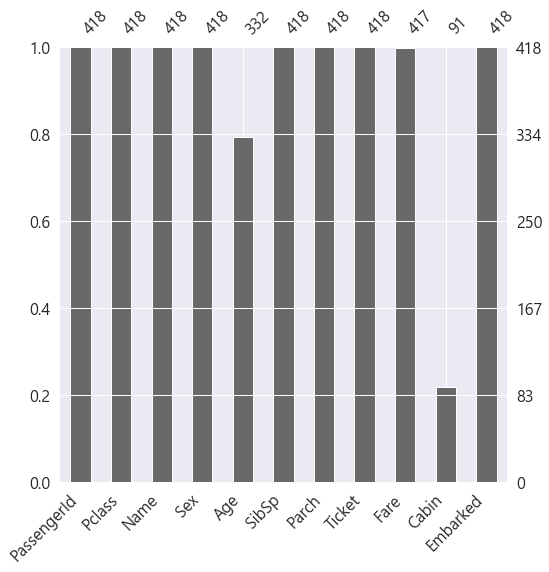

In [15]:
msno.bar(df_test, figsize = (8, 8))

### 1.3 Survived 분포 확인
`Survived`, 즉 예측하고자 하는 값의 분포를 확인하는 것은 중요합니다.  
train 데이터의 분포와
예측 된 test 데이터의 분포가  
비슷한 분포를 갖고 있지 않다면 잘못된 예측일 경우가 큽니다.  

또, 한쪽으로만 편중된 데이터가 존재한다면   
데이터 샘플링이 잘 되지 않았다는 증거가 될 수 있습니다.

Text(0.5, 1.0, '사망 vs 생존')

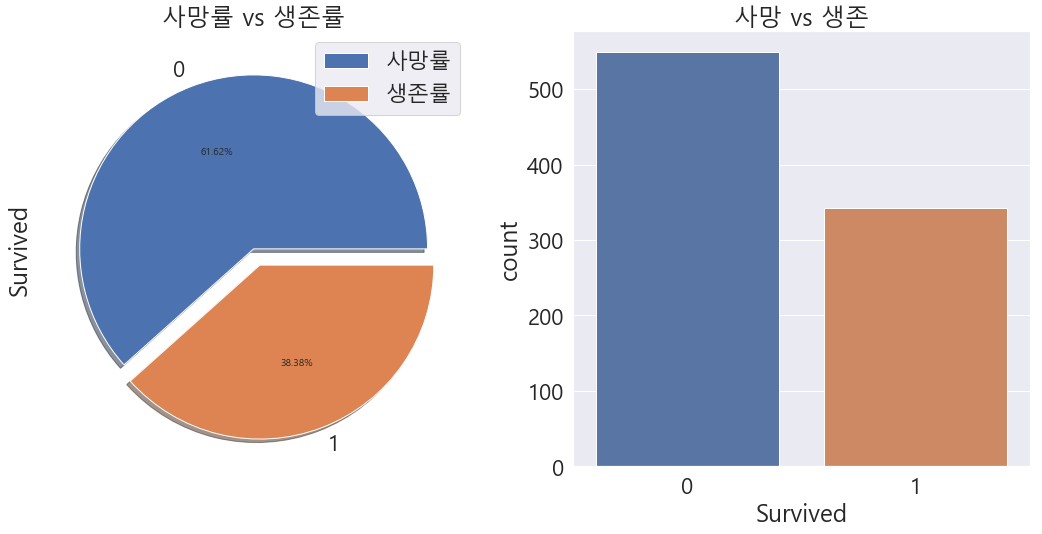

In [16]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived']\
    .value_counts()\
    .plot.pie(explode = (0, 0.1), # pie 그래프가 붙어있는 정도를 표현
              autopct = '%.2f%%', # pie 그래프 안에 소수점 2자리까지 %붙여 표시
              shadow = True, # 그림자 설정
              ax = ax[0])
ax[0].set_title('사망률 vs 생존률')
ax[0].legend(['사망률', '생존률'], loc = 'best')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('사망 vs 생존')

현재 데이터는 앞서 말씀드린 데이터의 분포와 유사합니다.

2200여명 중 1500여명이 사망했다.  
(약 68%는 사망, 32% 생존)

## 2. 탐색적 자료분석(EDA)
탐색적 자료 분석이란  
자신만의 가정을 세우고  
이를 확인해 보는 과정인데요.  
이 과정에서 여러가지 방법들을 사용합니다.  
- 데이터의 구조가 어떻게 되어있는가?
- 변수 간 어떠한 관계가 있는가?
- 데이터에 어떤 규칙이 존재하는가?
- 이상한 값들은 없는가?

위와 같은 과정들을 생각해보며 EDA를 시작해 보겠습니다.

데이터의 속성을 크게 2가지로 나타 낼 수 있습니다.

1. 범주형 변수 : 대상을 몇 가지의 속성으로 분류한 변수
     - 명목형 : 성별, 혈액형과 같은 단순 분류
     - 순서형 : 순서가 있는 변수
2. 수치형 변수 : 숫자로 표시하며, 이산형과 연속형으로 이뤄져있다.
     - 이산형 : 이산적인 값을 갖는 변수
     - 연속형 : 연속적인 값을 갖는 변수

우리가 다루는 데이터에서 변수의 속성을 구분해 보면,  

범주형 변수
- 명목형 : `Sex`, `Name`, `Ticket`, `Cabin`, `Embarked`
- 순서형 : `Pclass`

수치형 변수
- 이산형 : `Sibsp`, `Parch`
- 연속형 : `Age`, `Fare` 

### 2.1 Pclass
`Pclass`변수의 경우 범주형 데이터 입니다.  
우리가 확인 해 볼 사항은  
등급별로 인원수가 어떻게 되고,  
다른 변수들과 어떤 관계가 있는지를 확인해 보는 것입니다.

이 상황에서  
- `Pclass` 가 높으면 생존률이 올라갈까?
- `Pclass`와 `Sex` 간의 관계가 존재 할까?
- `Pclass`에 존재하는 나이 분포는 어떻게 될까?  

와 같은 가정을 하고 진행하면 좋습니다.  
다른 변수에서도 위와 같은 가정을 생각하며 해봅시다!  

먼저 `Pclass`별 인원수를 알아보도록 하겠습니다.

In [17]:
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


`Pclass`별 생존자 수를 알아보면

In [18]:
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


생존률을 손쉽게 보기 위해  
평균값을 표로 나타내 봅시다.  
값이 0과 1(사망/생존)로 나눠져 있어 평균으로 할 시 생존률이 구해집니다.

In [19]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


각 등급의 생존률은  
1등급 : 62.97%  
2등급 : 47.28%    
3등급 : 23.24%  
등급이 높을수록 생존률이 높은 것을 확인할 수 있습니다.  
이를 색깔을 이용하여 나타낸다면

In [20]:
(pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)
             .style
             .background_gradient(cmap = 'autumn_r'))

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


생존률 그래프를 bar형식으로 나타내면

Text(0, 0.5, 'percent')

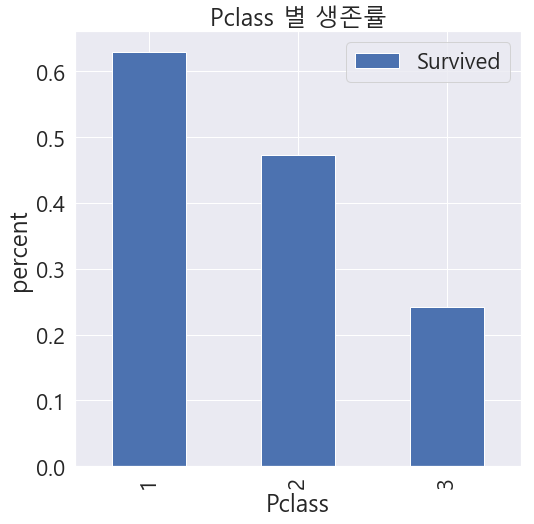

In [21]:
f, ax = plt.subplots(figsize = (8, 8))
df_train[['Pclass', 'Survived']]\
    .groupby('Pclass')\
    .mean()\
    .plot.bar(ax = ax)
ax.set_title('Pclass 별 생존률')
ax.set_ylabel('percent')

sns를 이용하여 생존자 수와 생존자 수를 같이 나타낼 수도 있습니다.

Text(0, 0.5, 'count')

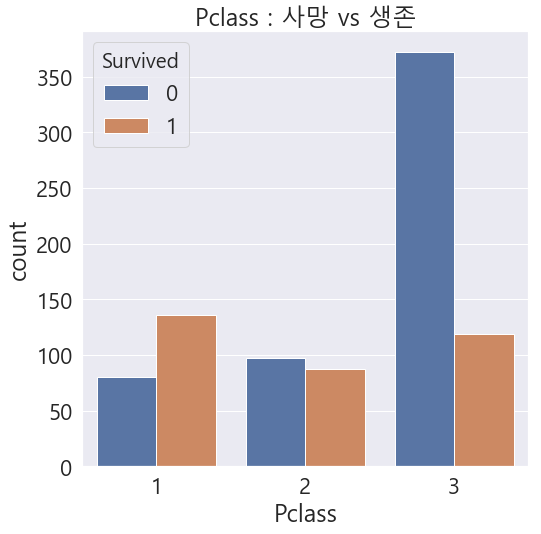

In [22]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.countplot('Pclass', hue = 'Survived', # hue = '변수' : 변수 기준으로 나눔
              data = df_train, ax = ax)
ax.set_title('Pclass : 사망 vs 생존')
ax.set_ylabel('count')

### 2.2 Sex
`Sex`의 분포를 확인하고  
생존률을 알아보도록 하겠습니다.

In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)\
            .style.background_gradient(cmap = 'spring_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Text(0.5, 1.0, '성별 간 생존/사망 수')

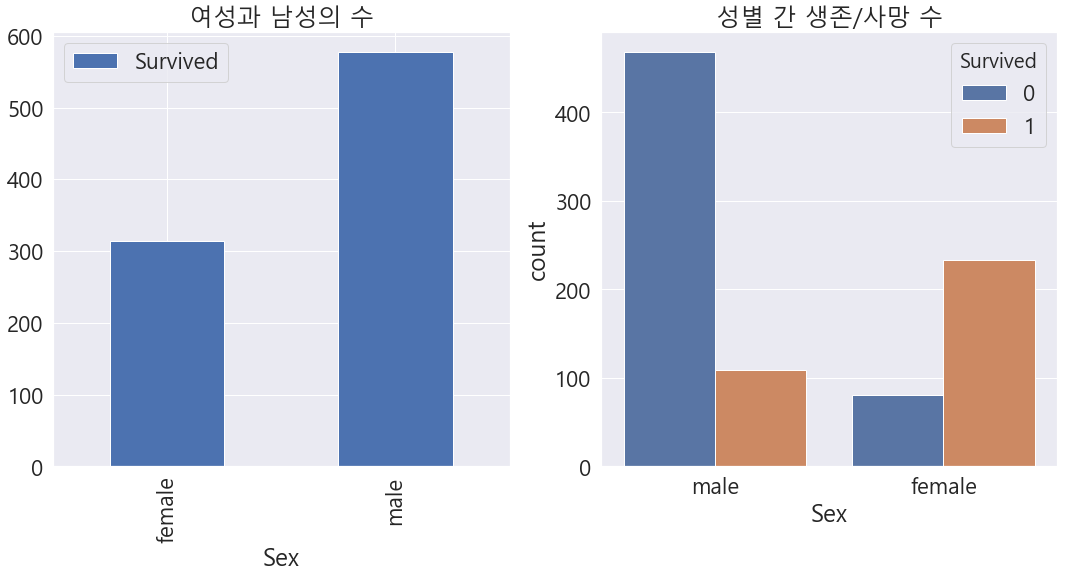

In [24]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
(df_train[['Sex', 'Survived']]
         .groupby('Sex')
         .count()
         .plot.bar(ax = ax[0]))
ax[0].set_title('여성과 남성의 수')
sns.countplot('Sex', hue = 'Survived',
              data = df_train, ax = ax[1])
ax[1].set_title('성별 간 생존/사망 수')

In [25]:
df_train[['Sex', 'Survived']].groupby('Sex').mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


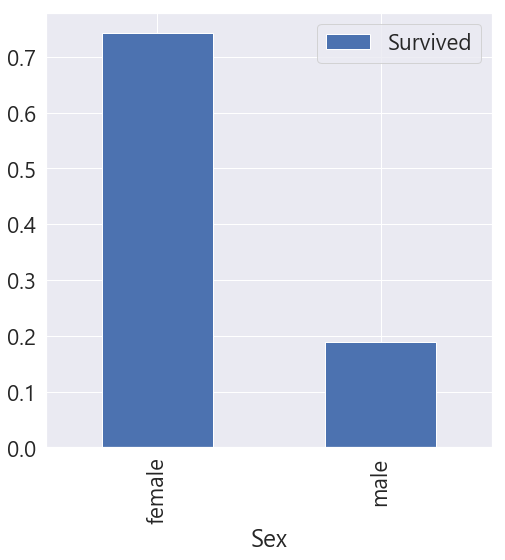

In [26]:
f, ax = plt.subplots(figsize = (8, 8))
(df_train[['Sex', 'Survived']]
     .groupby('Sex')
     .mean()
     .plot.bar(ax = ax))

남성 탑승객 : 549명  
여성 탑승객 : 342명
남성 탑승객이 여성 탑승객 보다 인원이 많지만,  
여성의 생존률은 약 74.20% 남성의 경우는 약 18.89% 입니다.

이는 여성들의 생존을 우선적으로 했음으로 보입니다.  

### 2.3 Pclass와 Sex
`Pclass`와 `Sex`간 분포와 생존률을 확인해 보도록 하겠습니다.

In [27]:
(pd.crosstab([df_train.Sex, df_train.Survived],
             df_train.Pclass, margins = True)
             .style.background_gradient(cmap = 'summer_r'))

In [28]:
(df_train[['Pclass', 'Sex', 'Survived']]
         .groupby(['Pclass', 'Sex'])
         .mean()) * 100

Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

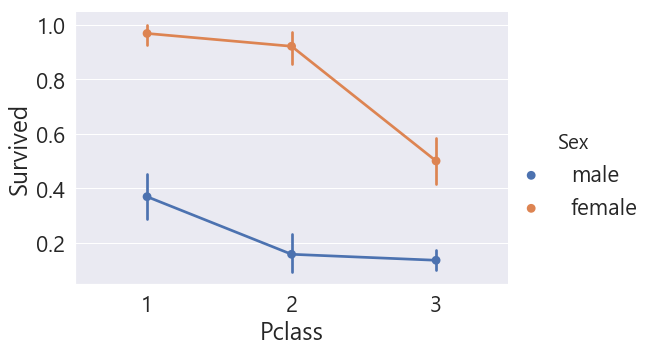

In [29]:
sns.factorplot('Pclass', 'Survived',
               hue = 'Sex', data = df_train, 
               size = 5, aspect = 1.5)

`Pclass`가 높고, `Sex`가 여성 경우 가장 생존률이 높았습니다.  
3등급인 여성(50%)조차 1등급의 남성(36.89%)보다 생존률이 높았습니다.  
이는 성별 변수가 생존률에 크게 영향을 미침을 알 수 있습니다.

### 2.4 Age
이번에는 `Age`의 분포와 생존률을 확인하도록 하겠습니다.

In [30]:
print('최소 나이 :', min(df_train['Age']),'세')
print('최대 나이 :', max(df_train['Age']),'세')
print('평균 나이 :', np.mean(df_train['Age']),'세')

최소 나이 : 0.42 세
최대 나이 : 80.0 세
평균 나이 : 29.69911764705882 세


갓난아이부터 80세 어르신까지  
다양한 연령대의 사람들이 탑승하고 있습니다.

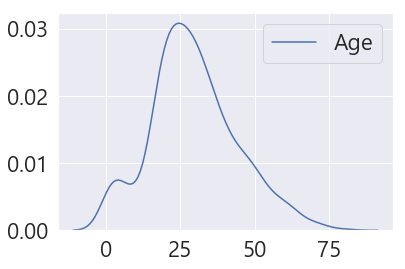

In [31]:
sns.kdeplot(df_train['Age'])

나이의 분포를 보게 되면  
기초통계치에서 봤던 것 처럼  
많은 사람들이 20~30대 임을 알 수 있습니다.

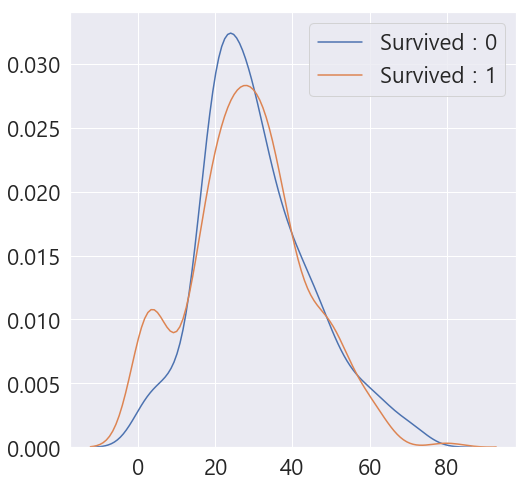

In [32]:
f, ax = plt.subplots(figsize = (8, 8))
for i in range(2):
    sns.kdeplot(df_train.loc[df_train['Survived'] == i, 'Age'], ax = ax)
plt.legend(['Survived : 0', 'Survived : 1'])

생존자의 분포를 보게되면  
어린 나이의 사람들의 주황색 선이 파란색 선보다 높습니다.   
이는 어린 아이들의 생존을 우선시 했음을 알 수 있습니다.  

### 2.5 Pclass, Sex 와  Age

각 분포를 보기 위해  
viloinplot을 이용해 나타내 보겠습니다.

Text(0.5, 1.0, 'Sex and Age vs Survived')

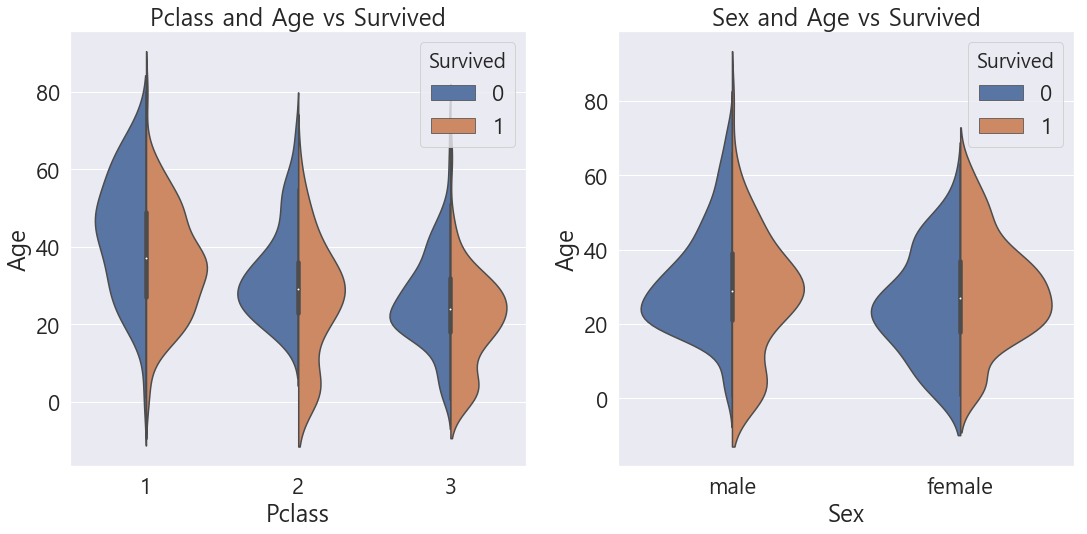

In [33]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived',
               data = df_train,
               split = True, # False시 두개의 분포를 따로 나타냄
               ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot('Sex', 'Age', hue = 'Survived',
               data = df_train,
               split=True,
               ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')

첫 번째 그래프는  
`Pclass`별로 `Age`가 변화함에 따라 생존 여부가 어떻게 달라지는지 나타내고 있습니다.

두 번째 그래프는
`Sex`별로 `Age`가 변화함에 따라 생존 여부가 어떻게 달라지는 지를 나타냅니다.

1. `Pclass`와 관계 없이 나이가 어릴수록 생존이 높은 것을 확인 할 수 있습니다.  
2. `Pclass`가 1인 구간에서는 20~40대 구간의 사람들이 생존이 높았습니다.

다음으로는  
`Pclass`별로 나이의 분포가 어떻게 돼 있는지 확인해 보도록하겠습니다.

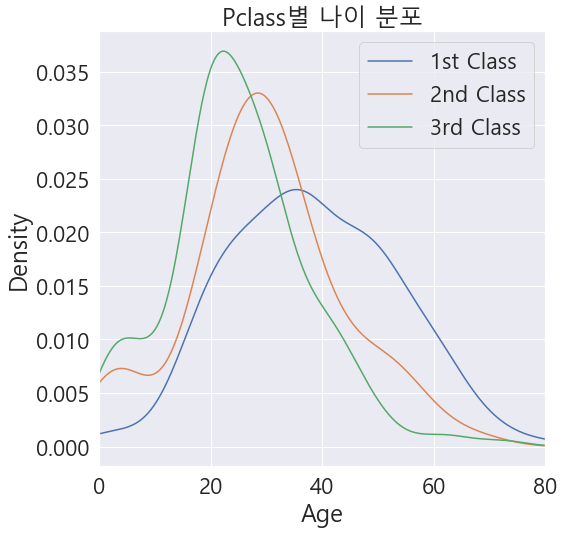

In [34]:
plt.figure(figsize = (8, 8))
for i in range(1,4):
    df_train.loc[df_train['Pclass'] == i, 'Age'].plot(kind = 'kde')
plt.xlabel('Age')
plt.xlim(0, 80)
plt.title('Pclass별 나이 분포')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

x축 구간을 0에서 80까지만 제한 하여 본다면  
1등석에는 20~50대의 사람들이 많고  
2등석에는 약 10대 이하, 20대 중반~ 30대 중반의 사람들이 많고  
3등석에는 약 10대 이하, 20대 초반 ~ 30대 초반의 사람들이 많습니다.    

`Pclass`의 등급이 높아질수록 연령대가 높은 사람들이 많고  
낮은 등급의 사람들에선 비교적 젊은 사람들이 많습니다.  

나이대가 높아질수록 생존률이 어떻게 변화하는지 알기 위해 누적확률을 이용해 표현해 봅시다.

Text(0.5, 0, 'Age')

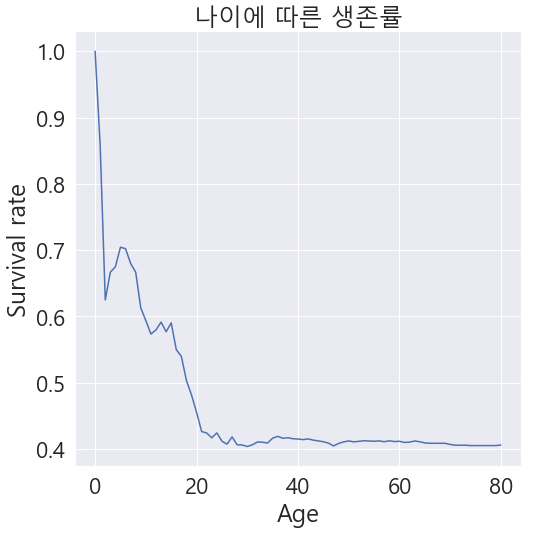

In [35]:
cum_rate = []
for i in range(1, 82): # 최소 나이가 1살보다 적고, 최대 나이가 80이므로 80을 포함할 수 있는 82까지 설정
    cum_rate\
    .append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize = (8, 8))
plt.plot(cum_rate)
plt.title('나이에 따른 생존률', y = 1)
plt.ylabel('Survival rate')
plt.xlabel('Age')

나이가 어릴수록 생존률이 크게 향상된 다는 것을 확인했습니다.  
후에 `Age`, `Pclass`, `Sex`가 생존여부를 예측하는데 큰 도움이 될 것으로 보입니다.

### 2.6 Embarked
`Embarked`는 탑승한 항구를 나타냅니다.  
위에서 확인한 바로는 3개의 항구가 나타나 있었습니다.

`Embarked`의 분포를 표현해보고  
생존률을 확인해 보도록 하겠습니다.

In [36]:
(pd.crosstab(df_train['Embarked'],
             df_train['Survived'],
             margins = True)
            .style.background_gradient(cmap = 'winter_r'))

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [37]:
(df_train[['Embarked', 'Survived']]
        .groupby('Embarked').mean()) * 100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


Text(0.5, 1.0, '항구 별 생존률')

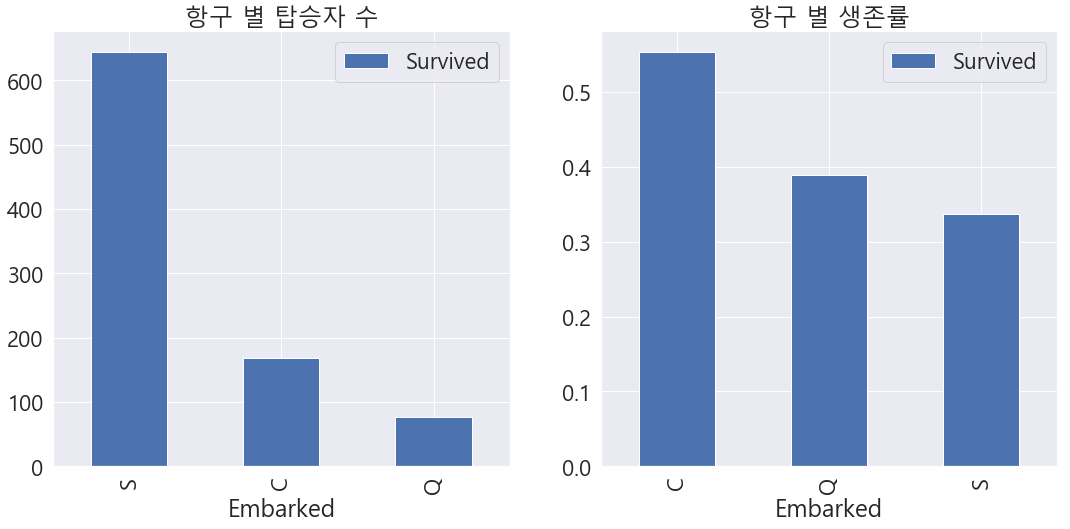

In [38]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
(df_train[['Embarked', 'Survived']]
         .groupby('Embarked')
         .count()
         .sort_values(by = 'Survived', ascending = False) # Survived를 내림차순으로 정렬
         .plot.bar(ax = ax[0]))
ax[0].set_title('항구 별 탑승자 수')
(df_train[['Embarked', 'Survived']]
         .groupby('Embarked')
         .mean()
         .plot.bar(ax = ax[1]))
ax[1].set_title('항구 별 생존률')

S 항구에서 사람들이 가장 많이 탔으나  
생존률이 가장 높은 것은 C 항구(55.38%) 였습니다.

In [39]:
(pd.crosstab([df_train.Embarked, df_train.Pclass],
             [df_train.Sex, df_train.Survived], margins = True)
             .style.background_gradient(cmap='summer_r'))

S 항구 `Pclass` 3을 제외하곤  
모든 항구와 등급에서 여성의 생존의 두드러지게 낮았습니다.  
남성의 경우 위에서 알아본 사실처럼   
3등급에서 가장 큰 사망률을 보입니다.

다음은 Embarked와 다른 변수들간의 상관을 보겠습니다.

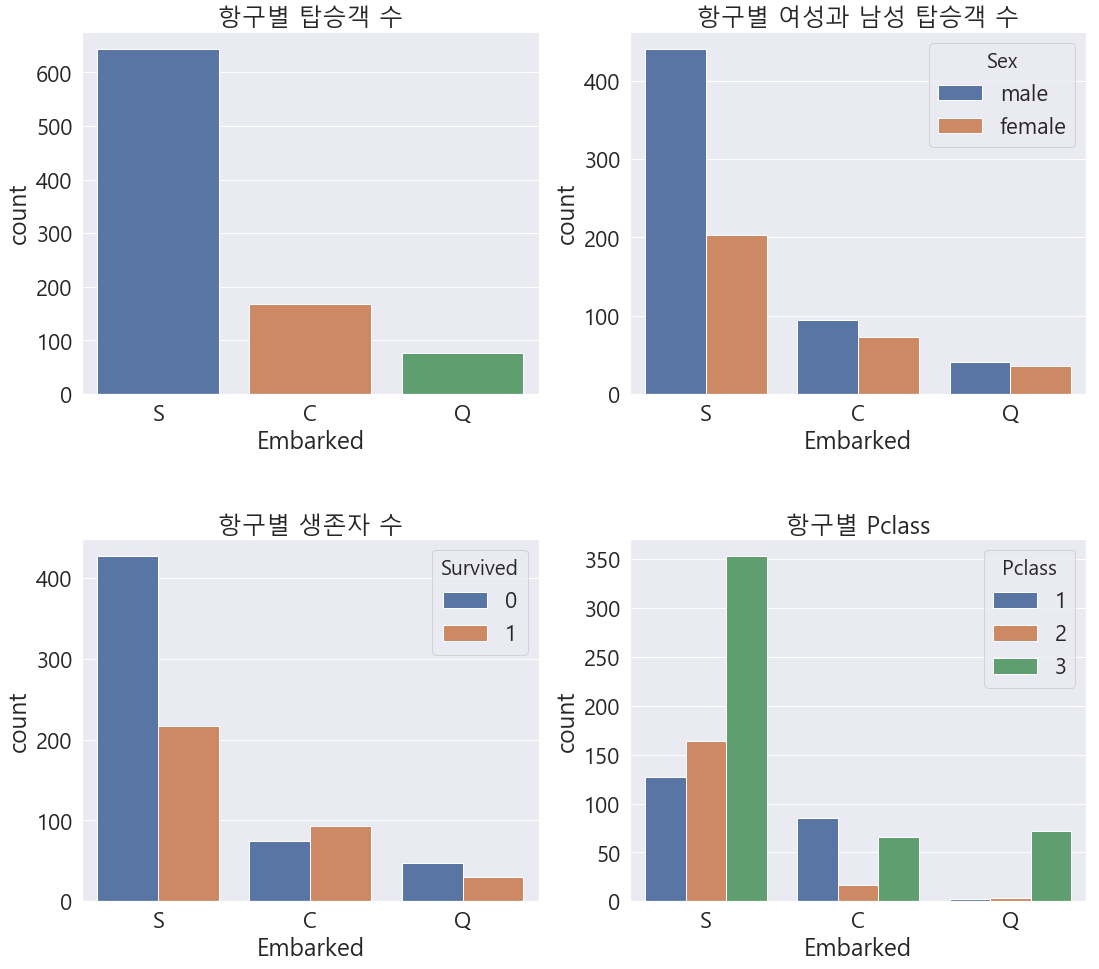

In [40]:
f, ax = plt.subplots(2, 2, figsize = (18, 16))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[0, 0].set_title('항구별 탑승객 수')
ax[0, 1].set_title('항구별 여성과 남성 탑승객 수')
ax[1, 0].set_title('항구별 생존자 수')
ax[1, 1].set_title('항구별 Pclass')

plt.subplots_adjust(wspace = 0.2, # 그래프 간 넓이 조정
                    hspace = 0.4) # 그래프 간 높이 조정

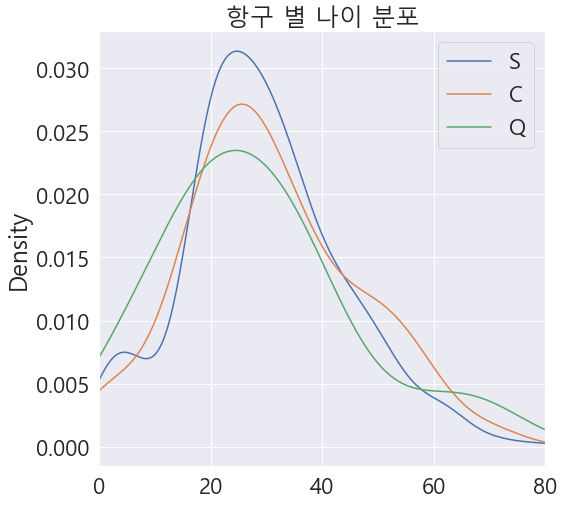

In [41]:
plt.figure(figsize = (8, 8))
labels = ['S', 'C', 'Q']
for i in labels:
    df_train.loc[df_train['Embarked'] == i, 'Age'].plot(kind = 'kde')
plt.title('항구 별 나이 분포')
plt.xlim(0, 80)
plt.legend(labels)

각각의 그래프를 통해 알 수 있는 점은
1. S 항구에서 탑승한 사람들의 수가 가장 많습니다.  

2. S 항구에서 남성의 비율이 다른 항구보다 월등히 높습니다.  
   다른 항구들은 남녀의 비율이 비슷합니다.  
   
3. S 항구는 남성의 비율이 높은 만큼 사망률도 높습니다.  
   반면에 Q 항구의 경우 여성의 비율이 높지만 생존률은 그보다 낮습니다.  
   C 항구의 경우 남성의 비율이 조금 높지만 생존률은 그보다 더 높습니다.  
   
4. `Pclass`를 나눠 확인했을 때  
   C 항구는 인원수 대비 고등급의 사람들의 비율이 높아 생존률이 높습니다.  
   반면에, Q 항구의 경우 3등급의 인원이 많지만 현격히 낮은 생존률을 보여주지 않습니다.  
   이는 다른 항구들에 비해 여성 비율이 높고, 나이가 어린 사람들이 많이 분포해  
   우선적으로 구출된 것으로 보입니다.

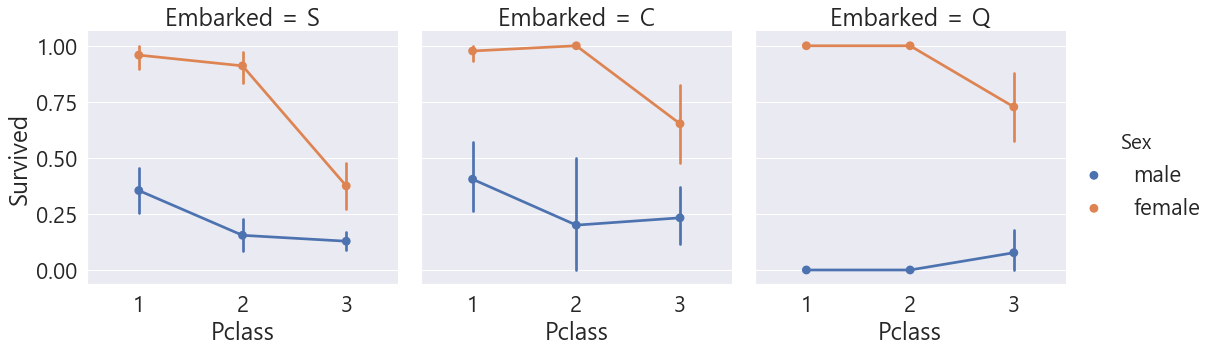

In [42]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = df_train)

C 항구와 Q 항구의 여성들의 생존률이 높으며  
또한 Q 항구 `Pclass` 3등급 여성의 생존률 또한 다른데에 비해 높은데    
이는 앞서 언급했던 나이가 어린 탑승객들의 구출을 우선으로 했기때문으로 보입니다.

### 2.7 SibSp
이 변수는 혼자 탑승했는지 아니면 가족 구성원들과 함께 탑승했는지를 나타냅니다.   

Sibling(Sib) = 형제/자매, 이복형제  
Spouse(Sp) = 배우자  
를 의미합니다.

In [43]:
(pd.crosstab([df_train.SibSp], df_train.Survived)
        .style.background_gradient(cmap='summer_r'))

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


대부분의 사람들이 혼자 또는 다른 한 명과 같이 탑승했습니다.

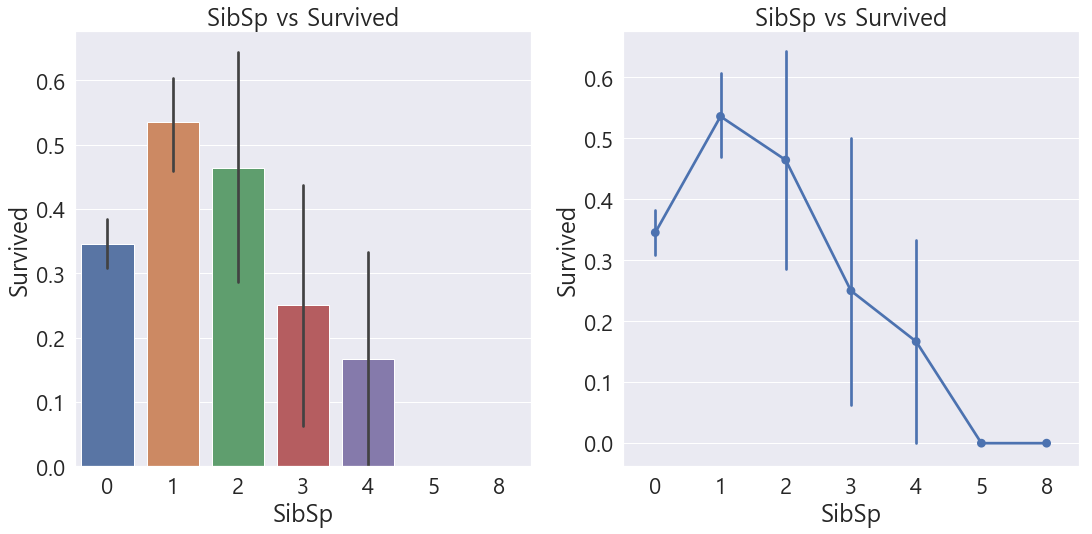

In [44]:
f , ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('SibSp', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)

In [45]:
(pd.crosstab(df_train.SibSp, df_train.Pclass, margins = True)
    .style.background_gradient(cmap = 'summer_r'))

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


혼자 탑승했을 경우 생존률이 40%보다 낮지만,  
1명 또는 2명(이는 편차가 크긴 함)일 경우 생존률이 높아지는 경향을 보입니다.  
이는 `Pclass`가 1등급과 2등급 합 대비 3등급 비율을 가장 높은 순서대로 나열하면  
1명, 2명, 0명 순으로 생존률이 높음을 알 수 있습니다.  
반면, 생존률이 3명부터는 낮아지는데 이는 3등급 비율이 높거나 모두 3등급인 경우이기 때문입니다.  

여기서도 `Pclass`가 높을 수록 생존에 유리하다는 것을 알 수 있습니다.

### 2.8 Parch
이 변수는 혼자 탑승했는지 아니면 가족 구성원들과 함께 탑승했는지를 나타냅니다.

Parents(Par) = 부모님  
Children(ch) = 자녀들  
를 의미합니다.

In [46]:
(pd.crosstab(df_train['Parch'], df_train['Pclass'])
    .style.background_gradient(cmap = 'RdBu'))

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


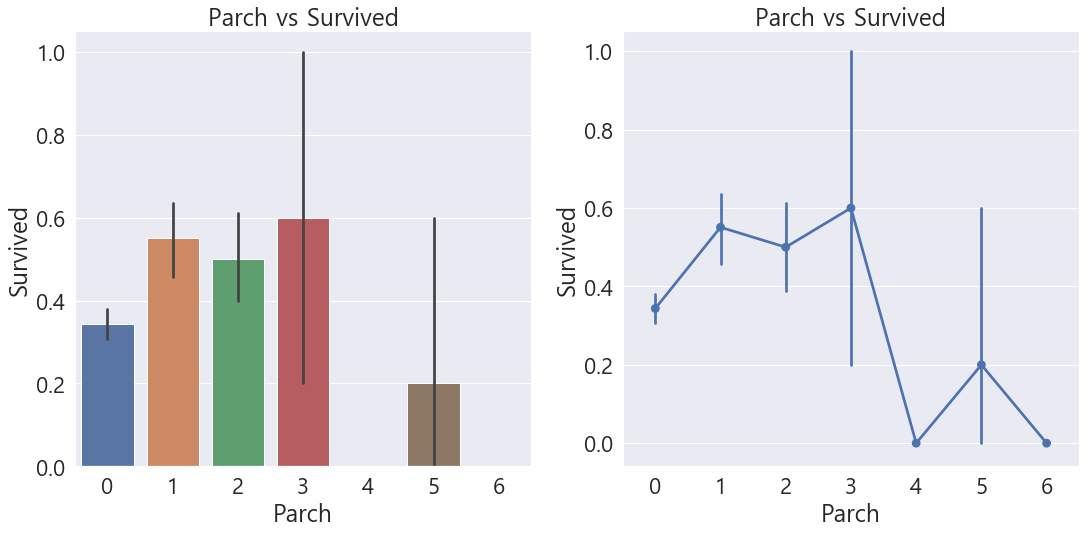

In [47]:
f , ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot('Parch', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)

결과는 SibSp와 상당히 비슷합니다.  
혼자 보다는 부모님 또는 자식과 탑승한 승객들이 생존 가능성이 더 높습니다.  
하지만, 일정 수준에선 또 감소합니다.  

### 2.9 Fare
탑승요금을 알아보는 단계입니다.

In [48]:
print('가장 비싼 탑승료:', df_train['Fare'].max())
print('가장 싼 탑승료:', df_train['Fare'].min())
print('평균 탑승료:', df_train['Fare'].mean())

가장 비싼 탑승료: 512.3292
가장 싼 탑승료: 0.0
평균 탑승료: 32.2042079685746


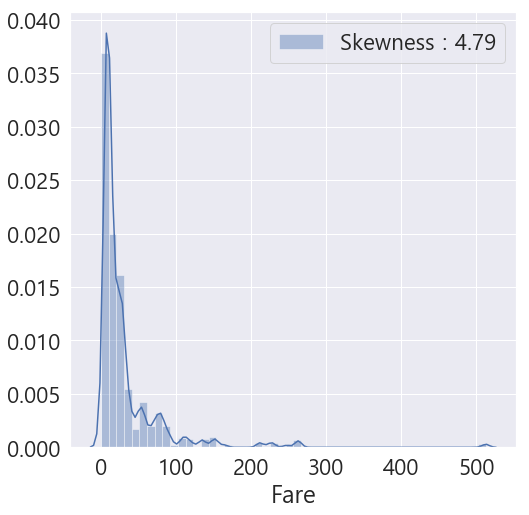

In [49]:
f, ax = plt.subplots(figsize = (8, 8))
(sns.distplot(df_train['Fare'], color = 'b',
             label = 'Skewness : {:.2f}'       # skewnsee는 왜도
             .format(df_train['Fare'].skew()),
              ax = ax))
ax.legend()

 왜도는 분포의 비대칭정도를 보는 척도입니다.
 - 왜도 = 0 : 좌우 대칭
 - 왜도 < 0 :  왼쪽 꼬리가 긴 그래프 
 - 왜도 > 0 :  오른쪽 꼬리가 긴 그래프  

왜도가 4.79로 상당히 치우쳐진 그래프입니다.
이를 그대로 사용할 경우 값을 예측하는 데 큰 영향을 미칠 수 있으므로  
후에 수정하도록 하겠습니다.

Text(0.5, 1.0, 'Fares in Pclass 3')

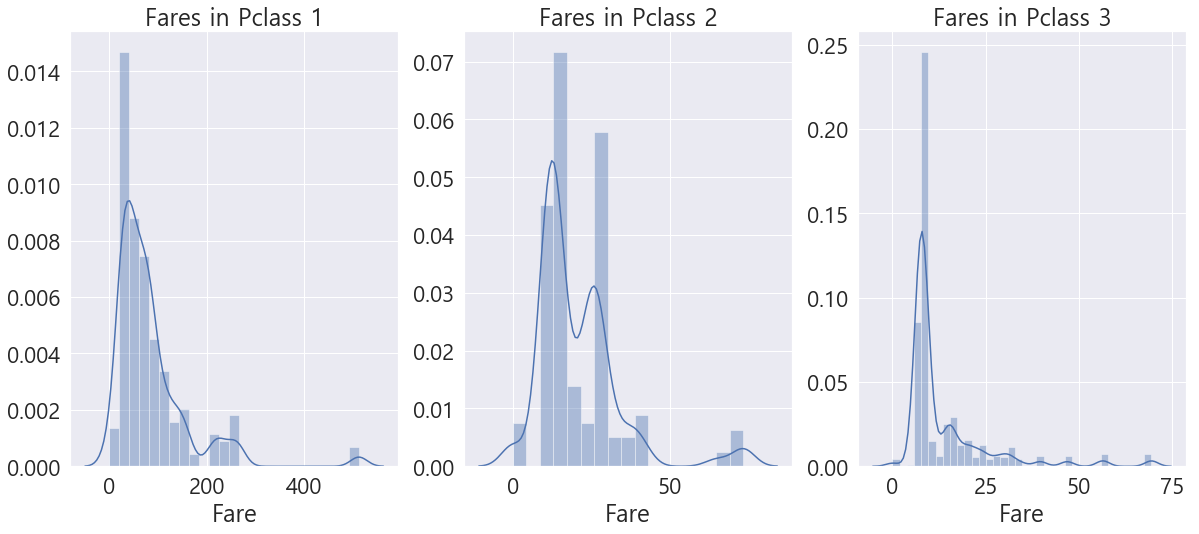

In [50]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
for i in range(3):
    sns.distplot(df_train.loc[df_train['Pclass'] == i+1].Fare, ax = ax[i])
ax[0].set_title('Fares in Pclass 1')
ax[1].set_title('Fares in Pclass 2')
ax[2].set_title('Fares in Pclass 3')

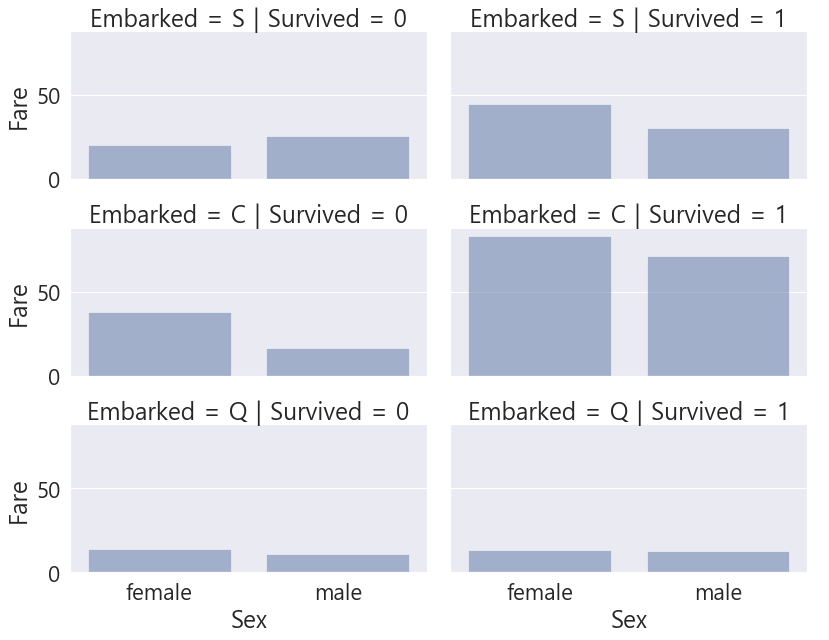

In [51]:
(sns.FacetGrid(df_train, row='Embarked', col='Survived', size = 3, aspect = 1.9)
    .map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
    .add_legend())

`Pclass`가 높을 수록 `Fare`의 범위가 넓어집니다.  
또한, 이를 `Embarked`와 `Survived` 변수와 비교했을 때  
전반적으로 여성의 `Fare`가 더 높았으며  
높은 탑승료를 낸 만큼 생존에 유리한 방과 서비스를 대접 받아 생존이 유리한 것으로 예상됩니다.

### 2.10 Cabin

In [52]:
(df_train['Cabin'].isnull().sum() / df_train.shape[0] ) * 100

77.10437710437711

`cabin`의 데이터의 약 77%가 결측치입니다.  
이 커널에서는 변수를 사용하지 않고 제거하도록 하겠습니다.  

### 2.11 Ticket

In [53]:
(df_train['Ticket'].isnull().sum() / df_train.shape[0]) * 100

0.0

In [54]:
df_train['Ticket'].value_counts()

CA. 2343              7
347082                7
1601                  7
CA 2144               6
3101295               6
347088                6
S.O.C. 14879          5
382652                5
17421                 4
LINE                  4
113781                4
W./C. 6608            4
347077                4
PC 17757              4
19950                 4
4133                  4
349909                4
2666                  4
113760                4
C.A. 31921            3
110152                3
110413                3
PC 17755              3
SC/Paris 2123         3
363291                3
13502                 3
F.C.C. 13529          3
345773                3
24160                 3
PC 17572              3
                     ..
345763                1
SOTON/O.Q. 3101310    1
237442                1
4579                  1
STON/O 2. 3101288     1
SOTON/O.Q. 392087     1
PC 17603              1
323592                1
113050                1
349205                1
C 7077          

`Ticket`의 경우 결측치는 존재하지 않지만,  
여러 문자들의 조합으로 돼 있습니다.  
이 커널에서는 다루지 않고 후에 전처리 파트에서 다뤄보도록 하겠습니다. 

여기까지 정리!

1. 클래스가 높을 수록 성별이 여성일수록 생존률이 높아집니다.
2. 또한 탑승료의 값이 높을수록 생존에 유리함으로 보입니다.
3. 나이가 어릴수록 생존할 확률이 올라갑니다.
4. 혼자인것보다 가족구성원이 1명 내지 2명일 경우 생존이 올라갑니다.
   하지만, 그보다 많은 경우에는 생존률이 감소합니다.
5. Q 항구의 탑승객들은 주로 3등급의 인원들로 구성돼 있고, 
   S 항구의 탑승객들은 모든 등급의 사람들이 많이 탑승했습니다.
6. `Parch`와 `SibSp`의 변수가 유사한 특성을 보이고 있어,
    두 변수를 합해 새로운 feature를 만드는 것도 좋아 보입니다.

## 2.12 Name
`Name`변수의 경우 우리가 알고있는 Mr/Mrs 와 같은 정보를 추출할 수 있습니다.  
이는 특성공학에서 다뤄보도록 하겠습니다.

### 2.12 Correlation

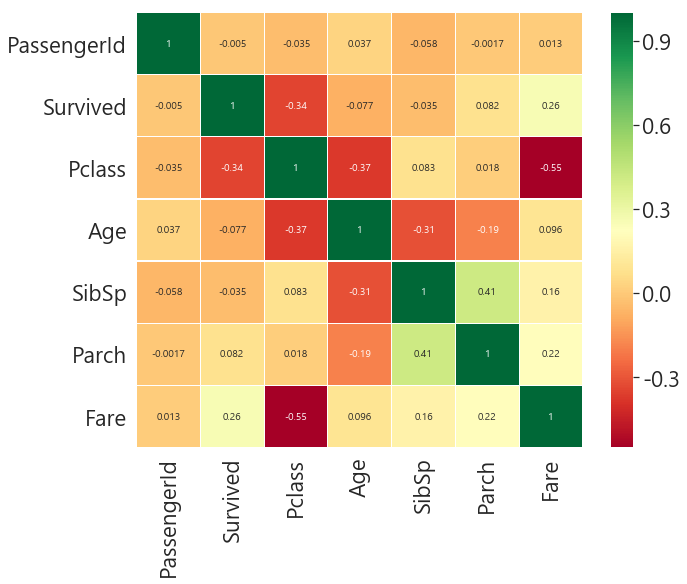

In [55]:
f, ax = plt.subplots(figsize = (10, 8))
(sns.heatmap(df_train.corr(),
             annot = True, # 네모 블럭안에 상관 계수 표시
             cmap = 'RdYlGn',
             linewidths = 0.2,
             ax = ax))

__Heatmap__ 을 이용한 상관관계
상관관계를 구할 때
수치형의 변수들만 포함됩니다.

__상관계수__  
두 변수 간의 상관정도를 보는 계수로  
-1과 1사이의 값을 취합니다.  

- __정적 상관__ 
    - 정적 상관이란 한 변수가 증가할때 다른 변수도 증가하는 형태를 보이는 것입니다.  
      1에 근접 할수록 두 변수간의 큰 상관관계가 있다고 볼 수 있습니다.  
  
- __부적 상관__ 
    - 부적 상관이란 한 변수가 증가할때 다른 변수는 감소하는 형태를 보이는 것입니다.  
      -1에 근접 할수록 두 변수간의 큰 상관관계가 있다고 볼 수 있습니다.
 
대개 절대값 0.5를 넘으면 상관관계가 존재한다고 볼 수 있는데,  
(0.3일 경우 약한 상관관계)  
여기서 `Pclass`와 `Fare`의 관계가 등급이 낮아질수록(1에서 3으로 갈수록, 값이 커질 수록)  
탑승료의 가격은 감소하는 것으로 보입니다.  

또한 `SibSp`변수와 `Parch`변수간에 0.41이라는 정적 상관관계가 있는 것으로 보입니다.

## 3. 특성 공학(Feature Engineering)

특성 공학에서는 결측치를 대체와  
의미 있는 변수 추출,  
파생변수를 생성하는 시간을 갖겠습니다.

이를 데이터 전처리라고 하는데  
이때  
__데이터 전처리를 하지 않고 그냥 모델을 돌려도 되지 않나?__  
란 의문이 생길 수 있을 겁니다.  
하지만, 결측치가 있는 데이터에 이를 대체하지 않았을 때  
모델 적합에서 오류가 발생할 수 있습니다.  

또한, 데이터가 엉망인 상태 인데  
이를 처리하지 않고 모델을 예측한다면  
실망스런 결과가 도출될 것 입니다.

### 3.1 Name


In [56]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

`Name` 변수를 보면 중간에 Mr와 Miss와 같은 경칭이 들어있습니다.  

이를 추출해 보도록 하겠습니다.  

잠깐!  
Mr/Master/Mrs/Miss/Ms 알아보기!  
Mr : 남성  
Master : 소년   
Mrs : 기혼 여성  
Miss : 미혼 여성   
Ms : 결혼 여부를 나타내지 않는 여성의 경칭  

여기서는 Mrs/Ms/Miss 를 하나의 값으로 통일해 사용하겠습니다.

In [57]:
df_train['Title'] = df_train['Name']\
                         .str.extract('([A-Za-z]+)\.') # 대/소문자 상관 없이 . 앞에 있는 알파벳을 추출
# () : 그룹으로 추출
# [] : []안의 형태에 맞는 문자를 추출
# [a-zA-Z] = [A-Za-z] : 알파벳 추출
# + : 하나 이상 추출
# \. : 문자 자체 . 

test 데이터에도 똑같이 적용해 줍니다.

In [58]:
df_test['Title'] = df_test['Name']\
                         .str.extract('([A-Za-z]+)\.')

In [59]:
df_train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [60]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [61]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

값을 살펴보니 경칭에 속하지 않은 단어들이 포함돼 있거나  
오타가 난 듯한 단어들이 몇몇 보입니다.  
이를 성별, 나이와 비교하여 수정 해 보는 시간을 갖겠습니다.

In [62]:
(pd.crosstab(df_train['Sex'], df_train['Title'])
     .style.background_gradient(cmap = 'summer_r'))

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [63]:
(pd.crosstab(df_test['Sex'], df_test['Title'])
     .style.background_gradient(cmap = 'summer_r'))

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [64]:
cols = [col for col in df_train['Title'].unique() if col not in ('Mr', 'Mrs', 'Miss', 'Master') ]
for col in cols:
    print(df_train.loc[df_train['Title'] == col, ['Age', 'Sex', 'Title']])
    print('-'*20)

     Age   Sex Title
30  40.0  male   Don
--------------------
      Age   Sex Title
149  42.0  male   Rev
150  51.0  male   Rev
249  54.0  male   Rev
626  57.0  male   Rev
848  28.0  male   Rev
886  27.0  male   Rev
--------------------
      Age     Sex Title
245  44.0    male    Dr
317  54.0    male    Dr
398  23.0    male    Dr
632  32.0    male    Dr
660  50.0    male    Dr
766   NaN    male    Dr
796  49.0  female    Dr
--------------------
      Age     Sex Title
369  24.0  female   Mme
--------------------
      Age     Sex Title
443  28.0  female    Ms
--------------------
      Age   Sex  Title
449  52.0  male  Major
536  45.0  male  Major
--------------------
      Age     Sex Title
556  48.0  female  Lady
--------------------
      Age   Sex Title
599  49.0  male   Sir
--------------------
      Age     Sex Title
641  24.0  female  Mlle
710  24.0  female  Mlle
--------------------
      Age   Sex Title
647  56.0  male   Col
694  60.0  male   Col
--------------------
      A

In [65]:
cols = [col for col in df_test['Title'].unique() if col not in ('Mr', 'Mrs', 'Miss', 'Master') ]
for col in cols:
    print(df_test.loc[df_test['Title'] == col, ['Age', 'Sex', 'Title']])
    print('-'*20)

    Age     Sex Title
88  NaN  female    Ms
--------------------
      Age   Sex Title
131  53.0  male   Col
202  47.0  male   Col
--------------------
      Age   Sex Title
149  30.0  male   Rev
164  41.0  male   Rev
--------------------
      Age   Sex Title
293  53.0  male    Dr
--------------------
      Age     Sex Title
414  39.0  female  Dona
--------------------


위에 포함된 
Mme, Mlle, Ms 를 제외한 단어들은 소수의 값들을 갖고 있기에  
이들을 Rare로 변경시켜주고  
Mme, Mlle, Ms, Miss 는 1번 값으로 대체해주겠습니다.  

In [66]:
df_train["Title"] = df_train["Title"].replace(['Lady', 'Countess', 'Capt','Col', 'Don',
                                               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train["Title"] = df_train["Title"].map({"Master" : 0, "Miss" : 1, "Ms" : 1 , "Mme" : 1, 
                                           "Mlle" : 1, "Mrs" : 1, "Mr" : 2, "Rare" : 3})
df_train["Title"] = df_train["Title"].astype(int)

In [67]:
df_test["Title"] = df_test["Title"].replace(['Lady', 'Countess', 'Capt','Col', 'Don',
                                               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test["Title"] = df_test["Title"].map({"Master" : 0, "Miss" : 1, "Ms" : 1 , "Mme" : 1, 
                                           "Mlle" : 1, "Mrs" : 1, "Mr" : 2, "Rare" : 3})
df_test["Title"] = df_test["Title"].astype(int)

[Text(0, 0, 'Master'),
 Text(0, 0, 'Miss'),
 Text(0, 0, 'Mr'),
 Text(0, 0, 'Rare')]

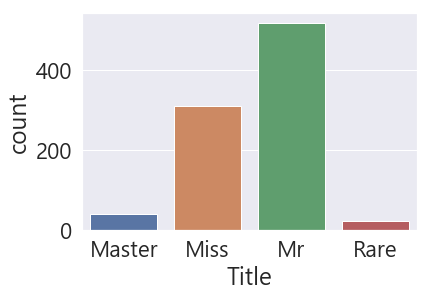

In [68]:
sns.countplot(df_train["Title"])\
    .set_xticklabels(["Master", "Miss", "Mr", "Rare"])

### 3.2 Age

먼저 `Age`의 값을 대체 해봅시다.  

여기선  
앞서 구한 `Title`을 통해  
평균 나이를 대입해 주겠습니다.  

In [69]:
df_train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
0,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
1,428.389068,0.739550,2.170418,27.736434,0.697749,0.655949,44.420044
2,454.499033,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560
3,547.043478,0.347826,1.347826,45.545455,0.347826,0.086957,37.169748


`Title`이 0인값 : 11세  
`Title`이 1인값 : 28세  
`Title`이 2인값 : 34세  
`Title`이 3인값 : 46세  
로 대체 하도록 하겠습니다.  

In [70]:
df_train.loc[(df_train['Title'] == 0) & (df_train['Age'].isnull()), 'Age'] = 5
df_train.loc[(df_train['Title'] == 1) & (df_train['Age'].isnull()), 'Age'] = 28
df_train.loc[(df_train['Title'] == 2) & (df_train['Age'].isnull()), 'Age'] = 33
df_train.loc[(df_train['Title'] == 3) & (df_train['Age'].isnull()), 'Age'] = 46

In [71]:
df_test.groupby('Title').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
0,1123.380952,2.714286,7.406471,1.571429,1.380952,38.494043
1,1095.403974,2.152318,30.203095,0.569536,0.602649,49.355962
2,1101.279167,2.320833,32.000000,0.270833,0.175000,25.563302
3,1117.500000,1.333333,43.833333,0.500000,0.333333,80.963883


`Title`이 0인값 : 12세  
`Title`이 1인값 : 31세  
`Title`이 2인값 : 34세  
`Title`이 3인값 : 44세  
로 대체 하도록 하겠습니다.  

In [72]:
df_test.loc[(df_test['Title'] == 0) & (df_test['Age'].isnull()), 'Age'] = 8
df_test.loc[(df_test['Title'] == 1) & (df_test['Age'].isnull()), 'Age'] = 31
df_test.loc[(df_test['Title'] == 2) & (df_test['Age'].isnull()), 'Age'] = 32
df_test.loc[(df_test['Title'] == 3) & (df_test['Age'].isnull()), 'Age'] = 44

연속적인 값인 `Age` 변수를 구간을 정해 나눠보도록 하겠습니다.  
10세 미만 0  
10대를 1  
20대를 2   
30대를 3  
40대를 4  
50대를 5  
60대 이상을 6으로 두어 범주화 하겠습니다.  

범주화를 하는 이유는 다음과 같습니다.  
- 집단 간 비교 하기
- 작은 값이나 사소한 값들의 영향을 줄이기

In [73]:
df_train['Age_band'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_band'] = 0
df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] < 20),'Age_band'] = 1
df_train.loc[(df_train['Age'] >= 20) & (df_train['Age'] < 30),'Age_band'] = 2
df_train.loc[(df_train['Age'] >= 30) & (df_train['Age'] < 40),'Age_band'] = 3
df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] < 50),'Age_band'] = 4
df_train.loc[(df_train['Age'] >= 50) & (df_train['Age'] < 60),'Age_band'] = 5
df_train.loc[df_train['Age'] >= 60,'Age_band'] = 6
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,3


In [74]:
df_test['Age_band'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_band'] = 0
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] < 20),'Age_band'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] < 30),'Age_band'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] < 40),'Age_band'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] < 50),'Age_band'] = 4
df_test.loc[(df_test['Age'] >= 50) & (df_test['Age'] < 60),'Age_band'] = 5
df_test.loc[df_test['Age'] >= 60, 'Age_band'] = 6
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,2


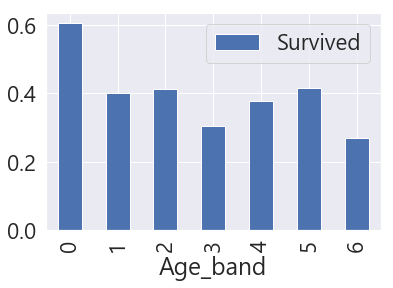

In [75]:
(df_train[['Survived', 'Age_band']]
     .groupby('Age_band').mean()
     .plot.bar())

In [76]:
df_train[['Sex', 'Survived', 'Age_band']].groupby(['Sex', 'Age_band']).mean()

Survived
Sex    Age_band          
female 0         0.633333
       1         0.755556
       2         0.704000
       3         0.833333
       4         0.687500
       5         0.888889
       6         1.000000
male   0         0.583333
       1         0.122807
       2         0.168919
       3         0.163717
       4         0.206897
       5         0.133333
       6         0.136364

In [77]:
pd.crosstab(df_train['Sex'], df_train['Age_band'], margins = True)

Age_band,0,1,2,3,4,5,6,All
Sex,,,,,,,,
female,30,45,125,60,32,18,4,314
male,36,57,148,226,58,30,22,577
All,66,102,273,286,90,48,26,891


위에서 살펴본 것 처럼  
전체적으로 여성의 비율이 높을수록  
생존률이 높게 나타납니다.

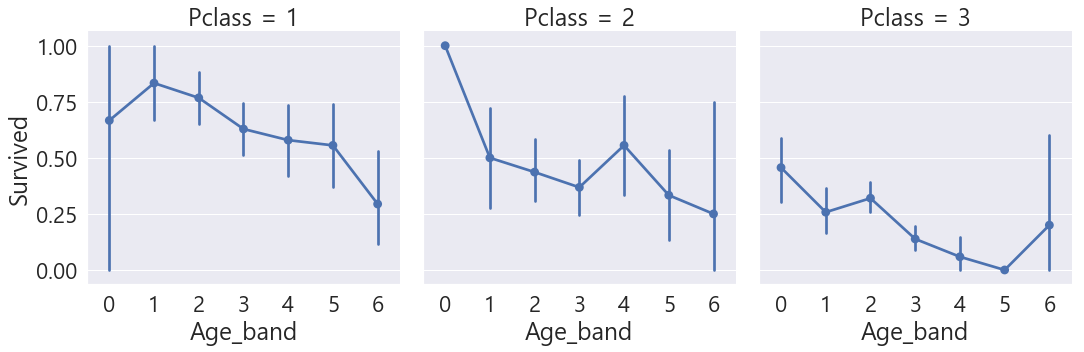

In [78]:
sns.factorplot('Age_band', 'Survived', data = df_train, col = 'Pclass')

위에서 살펴본 바와같이  
전반적으로 나이가 어린 탑승객들의 높았습니다.   
또한, `Pclass`가 높을수록 생존률 또한 높게 나타납니다.  

점으로 부터 긴 막대기가 위 아래로 표시되어 있는데  
이것은 값들의 표준편차를 나타내는 것 입니다.  
몇개의 값들에서 처음부터 끝까지 이어진 선들이 보이는데  
그 안에 속해있는 값들이 적어    
안정적인 값을 가지지 못함으로 보입니다.  

또한, 수직선이 없는(100% 또는 0%) 값들은  
1명이거나 모두 살았거나 모두 죽었음을 나타냅니다.  

In [79]:
df_train[(df_train.Age_band == 0) & (df_train.Pclass == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,1,0
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0,0
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,0,0


In [80]:
df_train[(df_train.Age_band == 6) & (df_train.Pclass == 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S,2,6
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5,NaN,S,2,6
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5,NaN,S,2,6
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0,NaN,S,2,6


In [81]:
df_train[(df_train.Age_band == 6) & (df_train.Pclass == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,2,6
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,2,6
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,2,6
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,1,6
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,2,6


### 3.3 Embarked

In [82]:
df_train['Embarked'].isnull().sum()

2

In [83]:
df_test['Embarked'].isnull().sum()

0

`Embarked`의 결측치의 개수는 2개입니다.  
이 중 가장 많은 것으로 결측치를 대체하도록 하겠습니다. 

In [84]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
df_train['Embarked'].fillna('S', inplace = True)

문자 변수인 `Embarked`를  
컴퓨터가 이해할 수 있도록 수치화하여 나타내겠습니다.  

S = 0  
C = 1  
Q = 2  
로 변환 시켜주겠습니다.

In [86]:
df_train['Embarked'] = df_train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [87]:
df_test['Embarked'] = df_test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

### 3.4 Sex
성별 변수도 수치화 시키도록 하겠습니다.  
female = 0   
male = 1  
로 변환 시켜주겠습니다.

In [88]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

### 3.5 Fare
`Fare` 변수는 test 데이터에만 결측치가 존재합니다.  
이를 `Pclass` 마다 `Fare`의 값의 변동이 크므로  
`Pclass`와 `Fare`를 고려하여 대체하도록 하겠습니다. 

In [89]:
df_test.loc[df_test['Fare'].isnull(), ['Pclass', 'Fare']]

,Pclass,Fare
152,3,NaN


In [90]:
df_test[['Pclass', 'Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.0000
2,15.7500
3,7.8958


탑승료는 소득 분포처럼 오른쪽 꼬리가 긴 그래프입니다.  
이 경우 평균값을 넣게 되면 실제 보다 큰 값으로 예측이 됩니다.  
이를 막고자 평균값이 아닌 중위수 값을 넣어 대체합니다. 

In [91]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = 7.8958

`Fare`의 분포는 비대칭성을 보이고 있습니다.  
이를 그대로 넣었을 경우 값이 제대로 예측되지 않을 경우가 있습니다.  

__어떻게 해야하지? 해결 할 방법이 있는가?__  

이때는 변수 변환 기법을 씁니다.   

변수들의 분포 형태에 따라 `log`, `루트`, `제곱` 변환 등이 있습니다.  
현재 오른쪽으로 긴 꼬리를 가진 분포를 가지고 있으므로  
`log` 변환을 취해 비대칭 정도가 나아지는 지 확인해보겠습니다.  

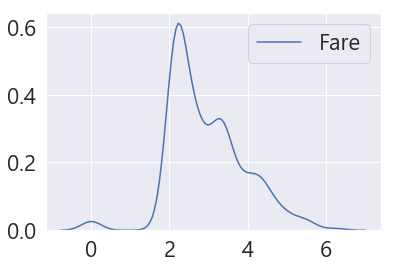

In [92]:
sns.kdeplot(np.log1p(df_train['Fare']))

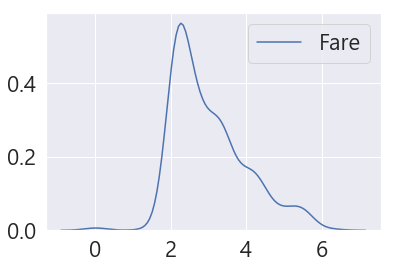

In [93]:
sns.kdeplot(np.log1p(df_test['Fare']))

비대칭 정도가 어느정도 사라진 모습을 보입니다.  
이를 `log`를 취해 값을 변경하고 모델에 적합하도록 하겠습니다.

In [94]:
df_train['Fare'] = np.log1p(df_train['Fare'])
df_test['Fare'] = np.log1p(df_test['Fare'])

### 3.6 SibSp + Parch
앞에서 `SibSp`와 `Parch` 변수가 가족과 관련 돼 있고  
유사한 분포를 보였습니다.  
이 둘을 이용하여 Family 변수를 생성해 보도록하겠습니다.  

In [95]:
df_train['Family'] = df_train['Parch'] + df_train['SibSp'] + 1 # 자기 자신을 포함하여
df_train['Alone'] = 0 # 0 : False / 1 : True
df_train.loc[df_train['Family'] == 1, 'Alone'] = 1

In [96]:
df_test['Family'] = df_test['Parch'] + df_test['SibSp'] + 1
df_test['Alone'] = 0
df_test.loc[df_test['Family'] == 1, 'Alone'] = 1

### 3.7 Correlation

In [97]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title            int32
Age_band         int64
Family           int64
Alone            int64
dtype: object

In [98]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title            int32
Age_band         int64
Family           int64
Alone            int64
dtype: object

사용하지 않을 변수를 제외하곤  
모두 수치형 데이터로 변화 한게 보입니다.  

제거할 변수 입니다.  
`PassengerId` : 일련 번호  
`Name` : 이름, `Title`로 필요 변수 추출   
`Ticket` : 이 커널에서 다루지 않음  
`Cabin` : 이 커널에서 다루지 않음  
`Age` : 나이, `Age_band`로 범주화 하여 나타냄

In [99]:
cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age']
df_train.drop(cols, axis = 1, inplace = True)
df_test.drop(cols, axis = 1, inplace = True)

In [100]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'Age_band', 'Family', 'Alone'],
      dtype='object')

In [101]:
df_test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'Age_band', 'Family', 'Alone'],
      dtype='object')

불필요한 변수를 제거 했으니  
변수들 간에 상관 관계를 살펴보도록 하겠습니다.  

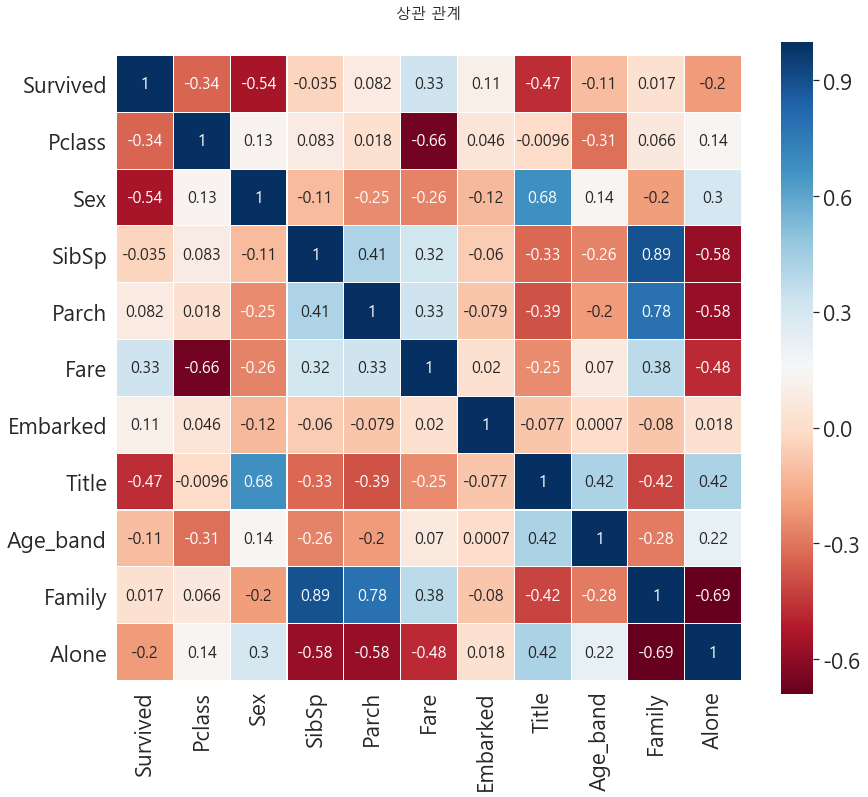

In [102]:
heatmap_data = df_train.corr()

colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('상관 관계', y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True,
           annot_kws = {'size' : 16})

del heatmap_data

EDA에서 살펴 본 것 처럼  

`Sex`와 
어린 아이와 여성 남성 그 외로  
나눠 수치화한 `Title`
`Pclass`와 `Fare`가
`Survived` 에 어느 정도의 상관 관계가 존재함을 확인할 수 있습니다.  

또, `Pclass` 가 높을 수록 `Fare`의 값이 높다는 것도 확인 했습니다.  

우리가 생성한 변수들도 서로 간 상관 관계가 존재함을 봤습니다.  

위의 내용을 제외하면  
다른 변수들 간에 상관이 높지 않습니다.  
이는 다중공선성의 영향이 적어  
정확한 예측을 할 수 있습니다.  

이 커널에서는 상관 관계를 높은 변수들을 처리하지 않고 진행하도록 하겠습니다.  


### 3.8 One-hot Encoding
수치화는 연속적인 값이여서  
0, 1, 2, 3, 4 와 같이 나타냈을 때  
0과 4의 관계보다 0과 1의 관계가 더 가깝게 계산이 됩니다.  

원핫인코딩을 사용하여   
1000  
0100  
0010  
0001  
위와 같은 모습으로 나타내면  
변수들 간의 효과를 동일하게 줄 수 있습니다.  

이전에 변경하였던  
`Title` 변수와 `Embarked`변수를  
원핫인코딩 하겠습니다. 

In [103]:
df_train = pd.get_dummies(df_train, columns = ['Title'], prefix = 'Title')
df_test = pd.get_dummies(df_test, columns = ['Title'], prefix = 'Title')

In [104]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

In [105]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_band,Family,Alone,Title_0,Title_1,Title_2,Title_3,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1,0,2.110213,2,2,0,0,0,1,0,1,0,0
1,1,1,0,1,0,4.280593,3,2,0,0,1,0,0,0,1,0
2,1,3,0,0,0,2.188856,2,1,1,0,1,0,0,1,0,0
3,1,1,0,1,0,3.990834,3,2,0,0,1,0,0,1,0,0
4,0,3,1,0,0,2.202765,3,1,1,0,0,1,0,1,0,0


In [106]:
df_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Age_band,Family,Alone,Title_0,Title_1,Title_2,Title_3,Embarked_0,Embarked_1,Embarked_2
0,3,1,0,0,2.178064,3,1,1,0,0,1,0,0,0,1
1,3,0,1,0,2.079442,4,2,0,0,1,0,0,1,0,0
2,2,1,0,0,2.369075,6,1,1,0,0,1,0,0,0,1
3,3,1,0,0,2.268252,2,1,1,0,0,1,0,1,0,0
4,3,0,1,1,2.586824,2,3,0,0,1,0,0,1,0,0


## 4. 모델 생성 및 학습

타이타닉 데이터는 생존 여부를 예측하는 것 입니다.  
즉, 생존과 사망인 binary classfication 입니다.  

이를 예측하기 위해 
Sklearn을 이용하여 모델 및 학습을 하고  
생존 여부를 예측하겠습니다.  

이 커널에서는 __랜덤 포레스트__ 모델만을 사용하겠습니다.  

__램덤 포레스트__는 적은 하이퍼 파라미터로도  
준수한 값을 나타내며  
과적합도 잘 안나타납니다.  

이를 통해 Baseline을 잡고  
모델을 향상시켜 보세요!

### 4.1 데이터 셋 나누기

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [108]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [109]:
X_train.shape, X_test.shape

((891, 15), (418, 15))

train 데이터를 두 개의 범주로 나눠   
잘 적합됐는지 검증하는 시간을 갖겠습니다.   

검증하는 데이터를 vaild 라고 합니다.   
vaild는 과적합을 막기위해 시행합니다.  

데이터를 나눠보도록 하겟습니다.  
train_test_split 을 사용하여 쉽게 train 셋을 분리할 수 있습니다.

In [110]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, 
                                            test_size = 0.3, random_state = 2020)

### 4.2 모델 생성

In [111]:
model = RandomForestClassifier() # Binary Classification 이므로 Classifier를 사용합니다.
model.fit(X_tr, y_tr)
pred = model.predict(X_vld)

In [112]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0],
                                           100 * metrics.accuracy_score(pred, y_vld)))

총 268명 중 82.46% 정확도로 생존을 맞춤


In [113]:
imp = model.feature_importances_
feature_imp = pd.Series(imp, index = df_test.columns)

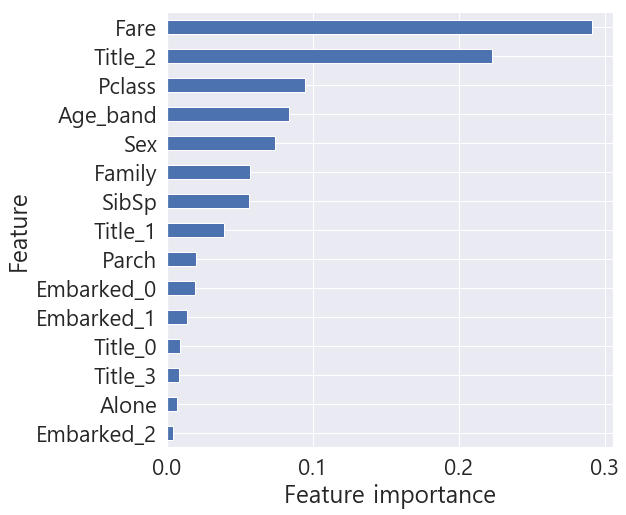

In [114]:
plt.figure(figsize = (8, 8))
feature_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

우리가 사용한 모델에서 `Fare` 가 가장 큰 영향력을 가지며,   
`Sex`, `Title_2`, `Pclass` 순으로 큰 역할을 합니다.  

위와 같은 그래프를 가지고 `Fare`가 가장 좋구나 라고 생각할 수 있지만  
모델 마다 다른 해석을 가져올 수 있습니다.  
데이터와 여러 통계적 해석을 덧붙여  
중요 변수를 선택 및 필요 없는 변수 제거를 하면   
모델 향상에 큰 도움이 될 것 입니다.  

## 5. 모델 예측 및 평가

In [115]:
submission = pd.read_csv('../input/gender_submission.csv')

In [116]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [117]:
submission.to_csv('./result.csv', index = False)